In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import os


In [ ]:
#Initialize Global Variables
data = []
data_dir = 'dataset/train_data'
le = LabelEncoder()
svm = SVC(kernel='rbf', probability=True)
rfc = RandomForestClassifier(random_state=42)

In [ ]:
# Tile image to hog features extraction
def extract_hog_features(file):
    file_path = os.path.join(data_dir, file)
    image = imread(file_path)
    gray_image = rgb2gray(image)
    resized_image = resize(gray_image, (800, 600), anti_aliasing=True)
    
    # Get image dimensions
    height, width = resized_image.shape
    
    # Calculate tile size
    tile_height = height // 8
    tile_width = width // 8
    
    # Create figure for 8x8 subplot
    fig, axes = plt.subplots(8, 8, figsize=(12, 12))
    fig.suptitle(f'Tiles for {file}', fontsize=16)
    # Dictionary to store features for this image
    hog_features = {}
    # Split image into 8x8 tiles
    for i in range(8):
        for j in range(8):
            # Calculate tile boundaries
            y_start = i * tile_height
            y_end = (i + 1) * tile_height
            x_start = j * tile_width
            x_end = (j + 1) * tile_width
            
            # Extract tile
            tile = resized_image[y_start:y_end, x_start:x_end]
            
            # Display tile in subplot
            axes[i, j].imshow(tile, cmap='gray')
            axes[i, j].axis('off')
            axes[i, j].set_title(f'{i},{j}', fontsize=6)
            
            # Extract HOG features from tile
            features = hog(tile, orientations=9,
                        pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2),
                        block_norm='L2-Hys')
            # Store in dictionary with key: (image_name, i, j)
            key = (file, i, j)
            hog_features[key] = features
            
            # Also append to global data list
            data.append({
                'image': file,
                'tile_i': i,
                'tile_j': j,
                'features': features
            })
    plt.tight_layout()
    plt.show()
    return hog_features

train_image1.jpg


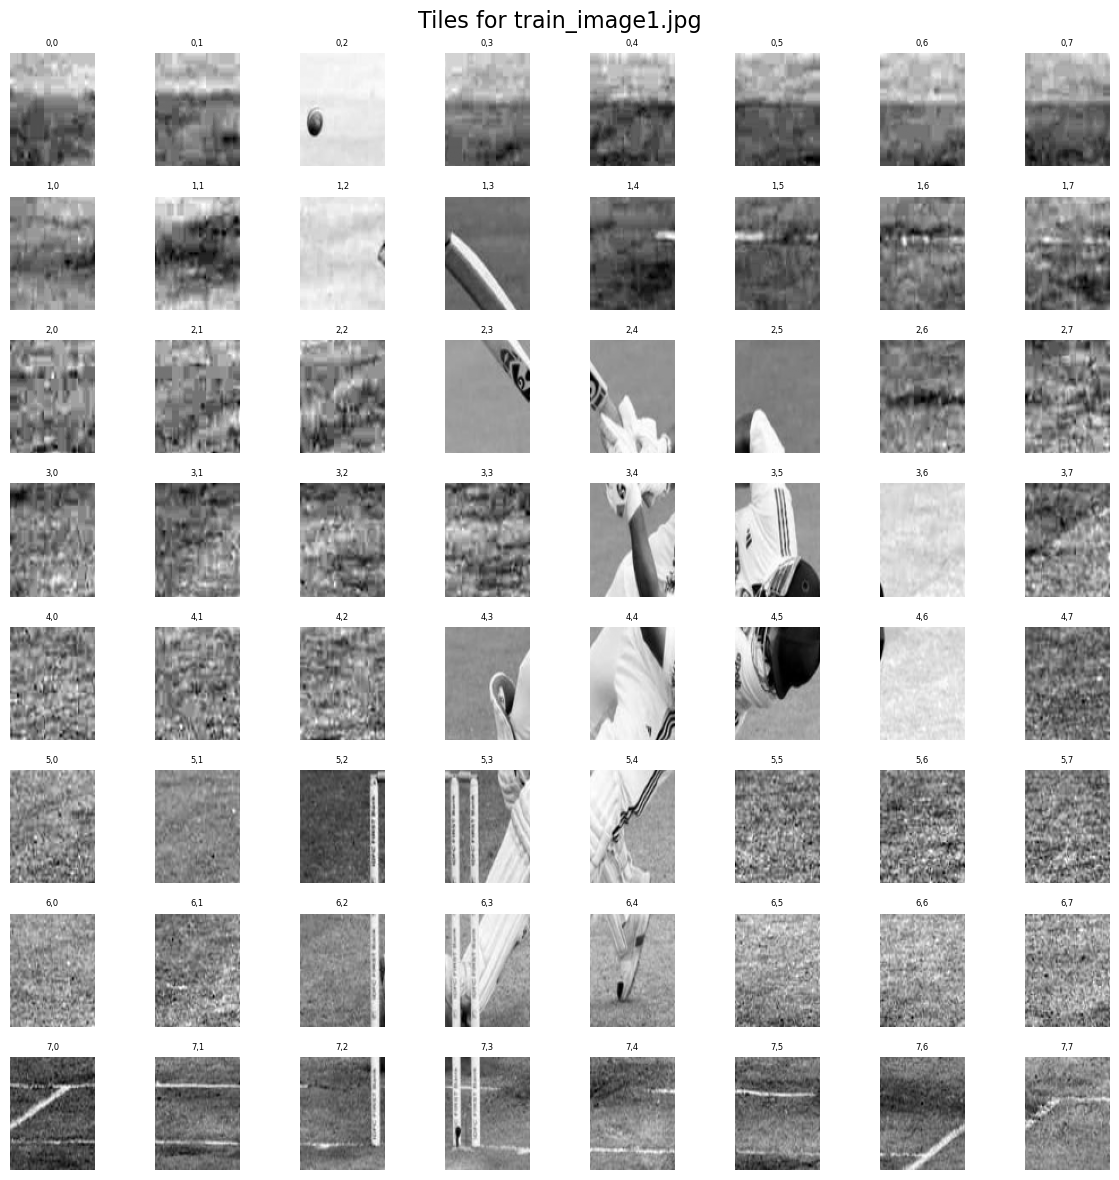

In [ ]:
#Run the extraction
for file in os.listdir(data_dir):
    hog_features = extract_hog_features(file)